This is a project on github: https://github.com/QED0711/audio_analyzer modified to do an analysis on the accuracy of generated speech  by voice cloning tools.

We compare a file of ground truth audio with audio generated by a speaker encoding- and a speaker adaptation-style voice cloning tool to compare the performance of both tools. 

Original speech data used in this research originates from the VCTK speech dataset.

Research done by Jeroen Weltens, student 1951880 at Hasselt University

Original:

# Summary:

For this visualization project, have created two classes to help identify spectral differences between audio files. The code below deomstrates how to produce these graphical comparisons using the `AudioAnalyzer` and `SpectrumCompare` classes.  

These classes can be found in the `python/AudioAnalyzer.py` file. All necessary imports can be found in that file. 

The audio files I use to demo these visualization processes can be found in `audio` subdirectory. These files are all different versions of the Beatles, _Yesterday_.  

* Original 1965
* Remaster 2009
* Remaster 2015  

For a detailed walkthrough and analysis, see [this medium article](https://medium.com/@qdizon/a-data-scientists-approach-to-visual-audio-comparison-fa15a5d3dcef)
***

# Table of Contents:

### 1. Imports
### 2. AudioAnalyzer Initialization
### 3. Individual Spectrum plotting
### 4. SpectrumCompare Initialization
### 5. Graph Types and Options for SpectrumCompare Instances
***

## Imports:

In [12]:
%load_ext autoreload
%autoreload 1

from python.AudioAnalyzer import *
%aimport python.AudioAnalyzer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(Jeroen): First we show the amplitude and spectogram plots in time to catch a raw glimps of how similar the speech is:

Ground truth:


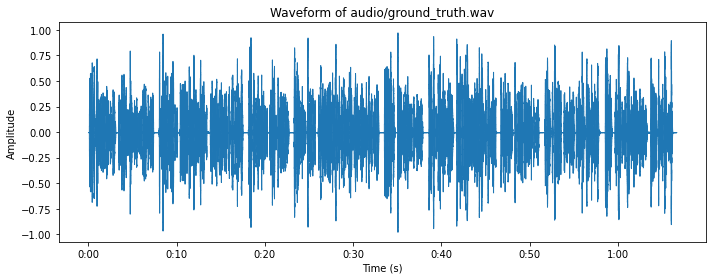

C:\Users\jeroe\AppData\Roaming\Python\Python37\site-packages\librosa\core\spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


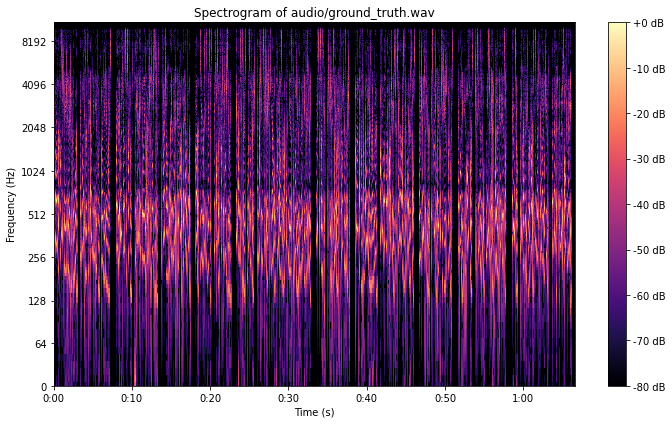

Speaker encoding:


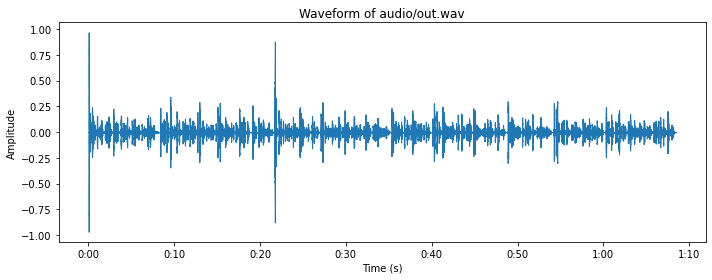

C:\Users\jeroe\AppData\Roaming\Python\Python37\site-packages\librosa\core\spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


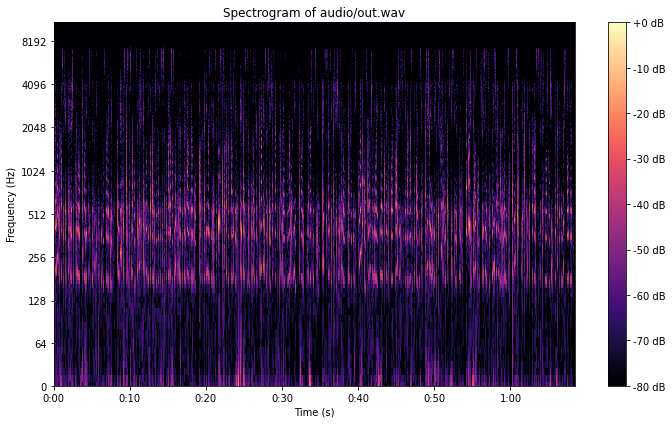

Speaker adaptation:


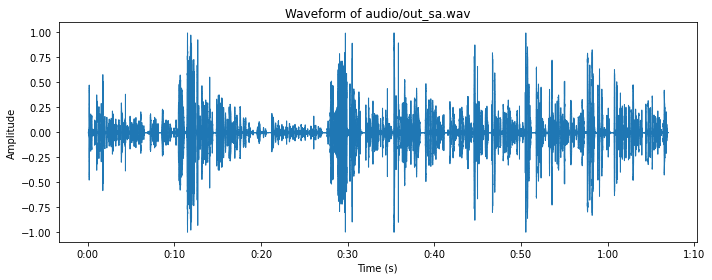

C:\Users\jeroe\AppData\Roaming\Python\Python37\site-packages\librosa\core\spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


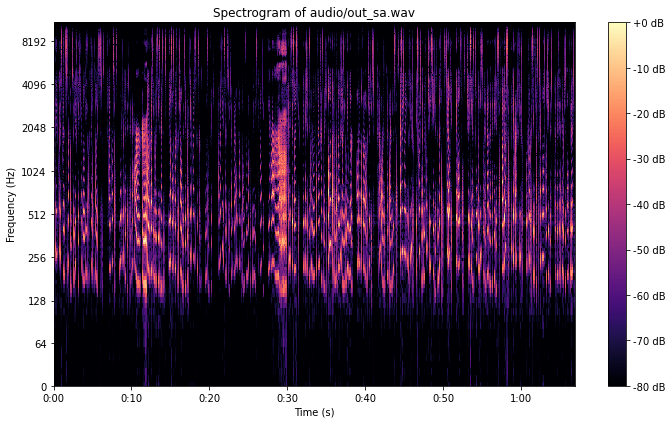

In [29]:
import librosa.display
import matplotlib.pyplot as plt

# Load the .wav file
wav_file = "audio/ground_truth.wav"
y, sr = librosa.load(wav_file)

print("Ground truth:")

# Create the plot
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of {}'.format(wav_file))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Compute the spectrogram
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Create the plot
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of {}'.format(wav_file))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

print("Speaker encoding:")

# Load the second .wav file
wav_file1 = "audio/out.wav"
y1, sr1 = librosa.load(wav_file1)

# Create the waveform plot for the second file
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y1, sr=sr1)
plt.title('Waveform of {}'.format(wav_file1))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Compute the spectrogram for the second file
D1 = librosa.amplitude_to_db(librosa.stft(y1), ref=np.max)

# Create the spectrogram plot for the second file
plt.figure(figsize=(10, 6))
librosa.display.specshow(D1, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of {}'.format(wav_file1))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

print("Speaker adaptation:")

# Load the thrid .wav file
wav_file2 = "audio/out_sa.wav"
y2, sr2 = librosa.load(wav_file2)

# Create the waveform plot for the third file
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y2, sr=sr2)
plt.title('Waveform of {}'.format(wav_file2))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Compute the spectrogram for the third file
D2 = librosa.amplitude_to_db(librosa.stft(y2), ref=np.max)

# Create the spectrogram plot for the third file
plt.figure(figsize=(10, 6))
librosa.display.specshow(D2, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of {}'.format(wav_file2))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

(Jeroen): Visually we could see a couple of things out right:

- The amplitude plots show that both generated files, but especially speaker encoding has same huge spikes in amplitude, whereas the original speech has a more smooth amplitude plot trough the speech.

- The spectogram plots show that in both generated files the higher and lower pitched parts of the speech are less present than in the original speech. Speaker encoding seems to generate more low frequencies, while speaker adaptation generates more higher frequencies.

## AudioAnalyzer Initialization

To instantiate an AudioAnalyzer instance, the first argument must point to a valid audio file. 

> Note: Make sure you any necessary audio codec installed on your computer. Most computers can work with WAV files, but some may have trouble working with MP3 files if the correct codec is not installed.

You may optionally (though it is recommended) set the sample rate and fft bin size. See Docstring for default values.   

In [20]:
se = AudioAnalyzer("audio/out.wav", input_sr=44100, fft_size=44100)
sa = AudioAnalyzer("audio/out_sa.wav", input_sr=44100, fft_size=44100)
gt = AudioAnalyzer("audio/ground_truth.wav", input_sr=44100, fft_size=44100)

(Jeroen): In the next part the spectograms are plotted independent of time to view the mean amplitude for each frequency. The generated graphs look to be more similar for speaker adaptation than for speaker encoding.

## Individual Spectrum plotting

For each initialized AudioAnalyzer instance, we can plot a basic spectrogram using the `.plot_spectrogram`. This specrogram averages amplitudes overall frequency bins for the entire duration of he excerpt/song. 

you can optionally set a window size to define your minimum and maximum plotted frequencies. This is done with the `min_freq` and `max_freq` respectively. 

Other arguments can be passed in to define the labels of the resulting graph. See docstring for details.  

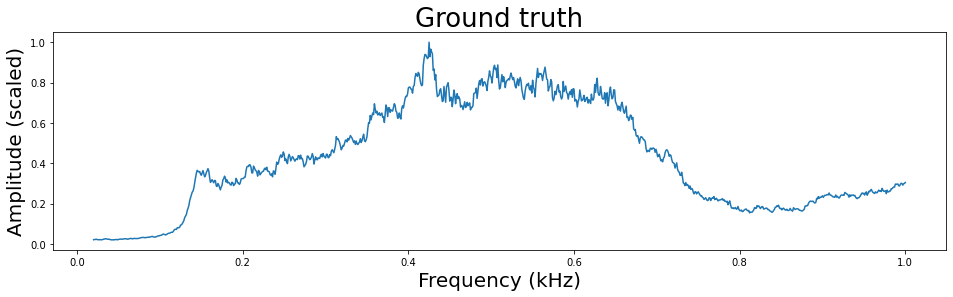

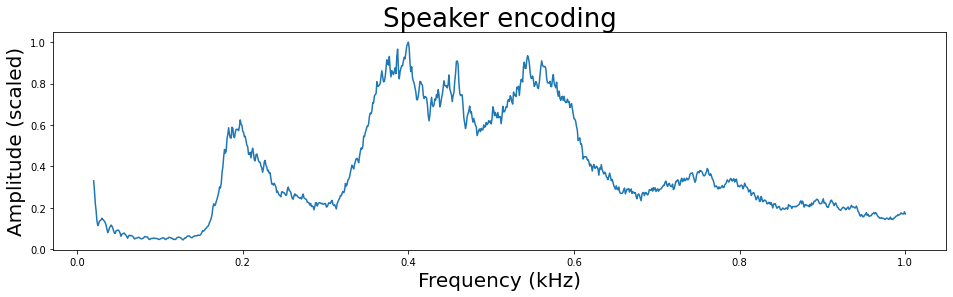

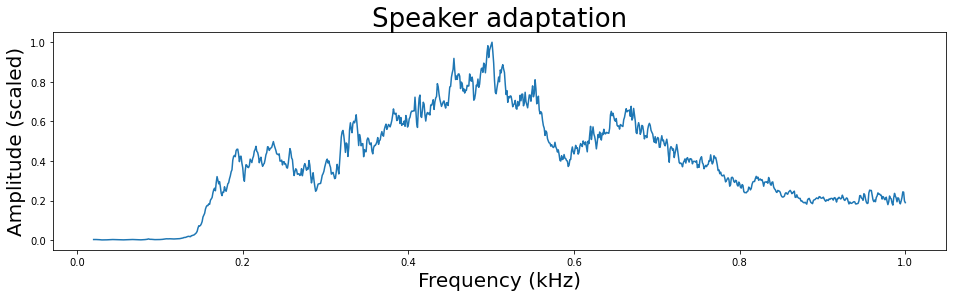

In [30]:
gt.plot_spectrum(min_freq=20, max_freq=1000, title="Ground truth")
se.plot_spectrum(min_freq=20, max_freq=1000, title="Speaker encoding")
sa.plot_spectrum(min_freq=20, max_freq=1000, title="Speaker adaptation")

## SpectrumCompare Initialization

To instantiate a `SPectrumCompare` instance, simply pass in two of the previously defined `AudioAnalyzer` instances. 

> Note: The order in which you pass your `AudioAnalyzer` instances in will determine certain graphing features later on (explained more below).

In [32]:
comp_se = SpectrumCompare(se, gt)
comp_sa = SpectrumCompare(sa, gt)
comp_gen = SpectrumCompare(se, sa)

## Graph Types and Options for SpectrumCompare Instances

The below code portions show whats kinds of visualizations are currently available, and how to plot them. Docstrings are avilable that explain many of the options, but I will detail some of the main ones here.

### Options for Graph Types:

#### plot_spectrum_group

Useful for comparing the relative amplitudes at varying frequency bins for the two excerpts. Note that the y-axis has been scaled from 0 to 1 so the amplitudes can be compared on the same scale. 

4 lines are plotted:

* Blue - Spectrogram of first `AudioAnalyzer` input
* Orange - Spectrogram of second `AudioAnalyzer` input
* Green - The difference in amplitudes between the two excerpts
* Red - The threshold line. When the green line appears below the red line, the first `AudioAalyzer` input has more amplitude at that instance. When the green line is above the red line, then the second `AudioAnalyzer` input has more amplitude at that moment.

#### plot_spectrum_heatmap

This heatmap is a generalized version of the plot_spectrum_group. It converts the amplitude difference to a heatmap, and displays one of the spectrograms as an overlay on that heatmap. "Hotter" spots indicate a larger difference in favor of the second `AudioAnalyzer` input. "Colder" spots indicate a larger difference in favor of the first `AudioAnalyzer` input.

you can choose which spectrogram to display with the `plot_spec1` argument. Setting this to `True` will plot the first `AudioAnalyzer` spectrogram. Setting it to `False` will plot the second. 

#### plot_amplitude_distributions

These graphs show the mean sampling distributions of amplitudes for both `AudioAnalyzer` instances. There is no frequency information in these graphs. Rather, they show if one excerpt is generally louder than the other. 

Additionally, a t test is run, and the t statistic and p values are returned to show if the mean amplitudes of the excerpts are statistically different. 

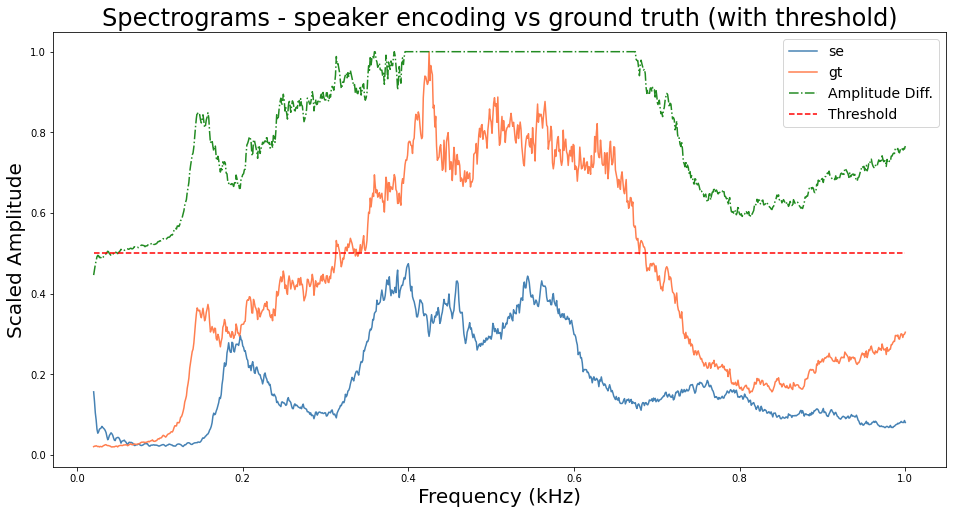

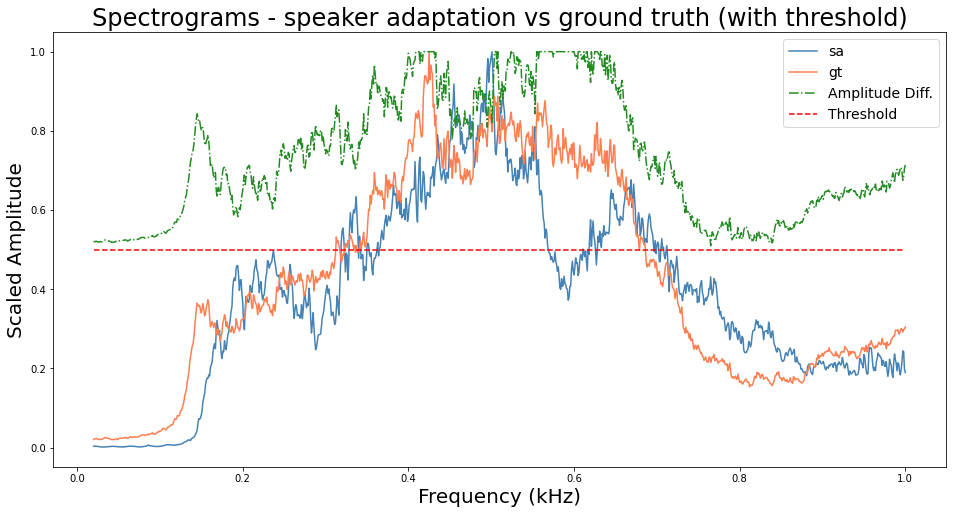

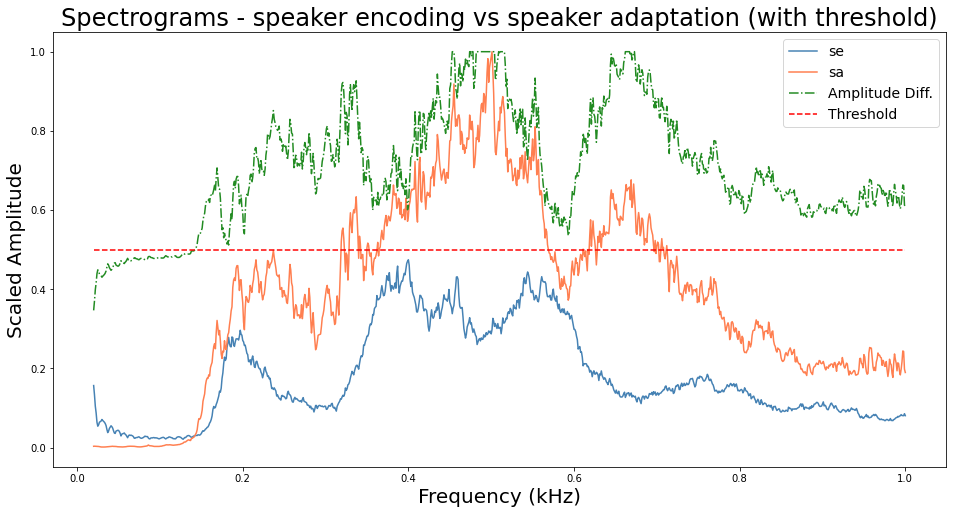

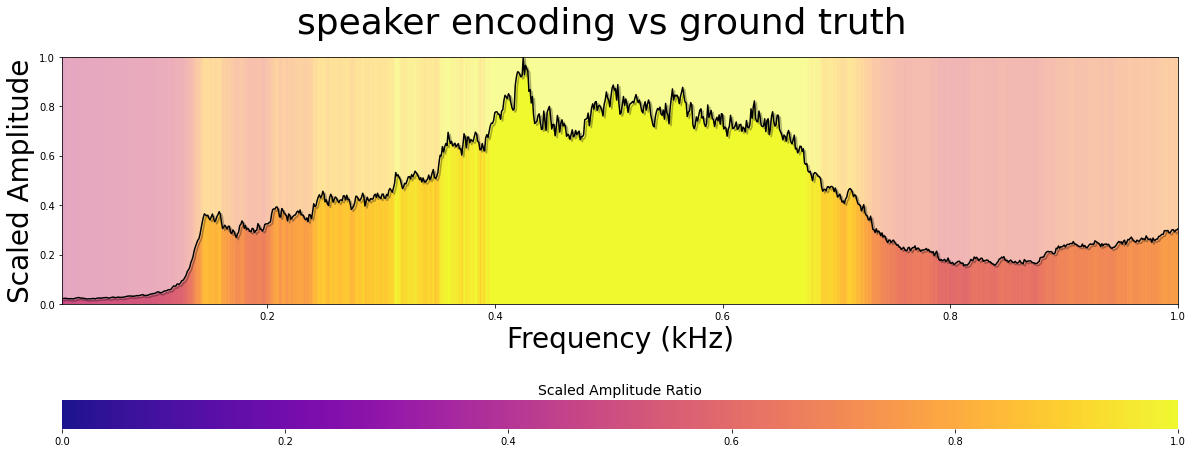

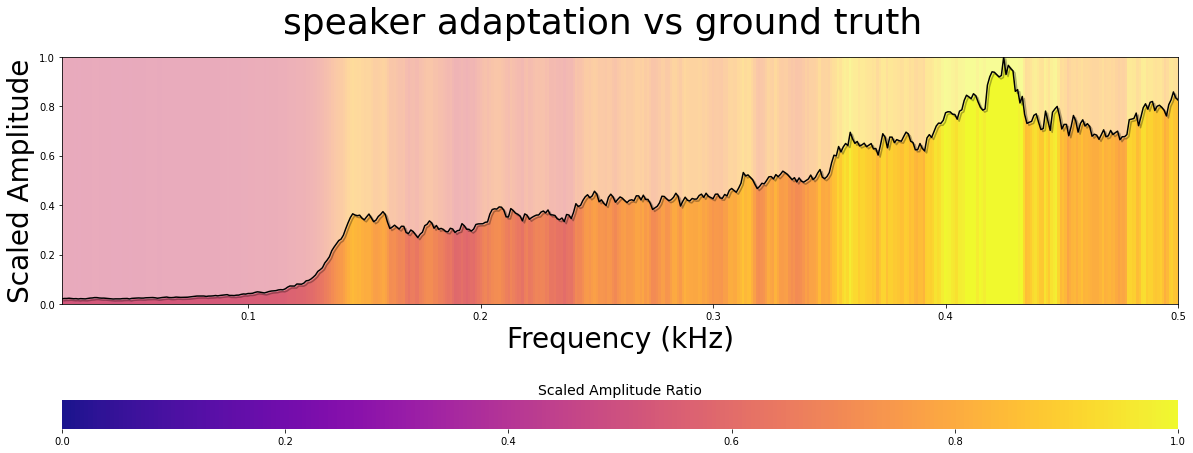

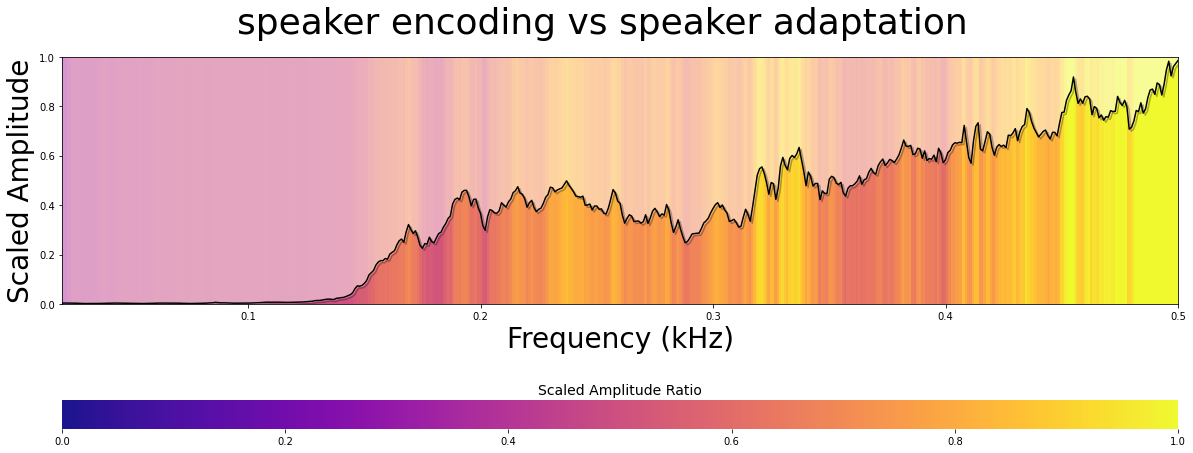

In [35]:
comp_se.plot_spectrum_group(frange=(20,1000), 
    ratio=True, 
    threshold=True,
    title="Spectrograms - speaker encoding vs ground truth (with threshold)", 
    legend=("se", "gt", "Amplitude Diff.", "Threshold")
    )
    
comp_sa.plot_spectrum_group(frange=(20,1000), 
    ratio=True, 
    threshold=True,
    title="Spectrograms - speaker adaptation vs ground truth (with threshold)", 
    legend=("sa", "gt", "Amplitude Diff.", "Threshold")
    )

comp_gen.plot_spectrum_group(frange=(20,1000), 
    ratio=True, 
    threshold=True,
    title="Spectrograms - speaker encoding vs speaker adaptation (with threshold)", 
    legend=("se", "sa", "Amplitude Diff.", "Threshold")
    )

comp_se.plot_spectrum_heatmap(
    frange=(20,1000), 
    plot_spec1=False,
    title="speaker encoding vs ground truth"
)

comp_sa.plot_spectrum_heatmap(
    frange=(20,500), 
    plot_spec1=False, 
    title="speaker adaptation vs ground truth"
)

comp_gen.plot_spectrum_heatmap(
    frange=(20,500),
    plot_spec1=False,
    title="speaker encoding vs speaker adaptation"
)


In [48]:
import librosa
from scipy.spatial.distance import cosine
import soundfile as sf

# Load and preprocess the audio signals (convert to mono)
y1, sr1 = sf.read(wav_file1)
y2, sr2 = sf.read(wav_file2)

# Extract MFCC features
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1)
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2)

# Calculate cosine similarity between MFCCs
similarity = 1 - cosine(mfcc1, mfcc2)

# Convert to percentage
similarity_percentage = similarity * 100

print("Similarity: {:.2f}%".format(similarity_percentage))

ParameterError: Invalid shape for monophonic audio: ndim=2, shape=(2953208, 2)

c:\Users\jeroe\Documents\school\master\eerste_jaar\bachelorproef\audio_analyzer\python\AudioAnalyzer.py:240: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples_1)
c:\Users\jeroe\Documents\school\master\eerste_jaar\bachelorproef\audio_analyzer\python\AudioAnalyzer.py:241: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

,T-Statistic,P-Value
0,-4.250134,0.000022


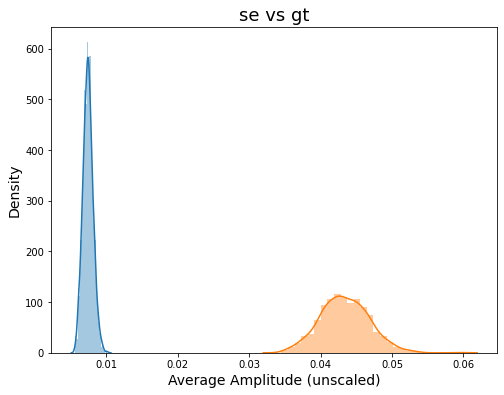

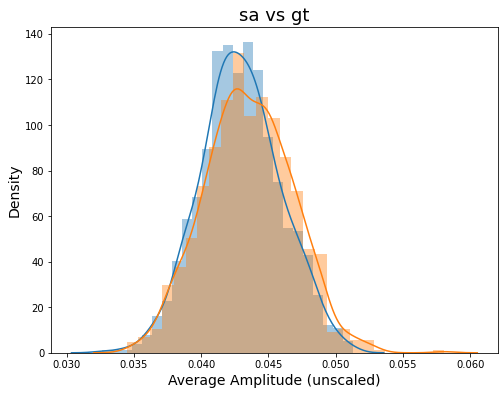

In [37]:
comp_se.plot_amplitude_distributions(title="se vs gt")
comp_sa.plot_amplitude_distributions(title="sa vs gt")

(Jeroen): Hier merk je sterk dat qua amplitude de speaker adaptation het veel beter doet dan speaker encoding.

## Additional Demonstration:

The code below shows what happens when we compare an excerpt to itself. As expected, the amplitudes are not statistically different, and the heatmap plot has no color variation. 

c:\Users\jeroe\Documents\school\master\eerste_jaar\bachelorproef\audio_analyzer\python\AudioAnalyzer.py:240: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples_1)
c:\Users\jeroe\Documents\school\master\eerste_jaar\bachelorproef\audio_analyzer\python\AudioAnalyzer.py:241: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

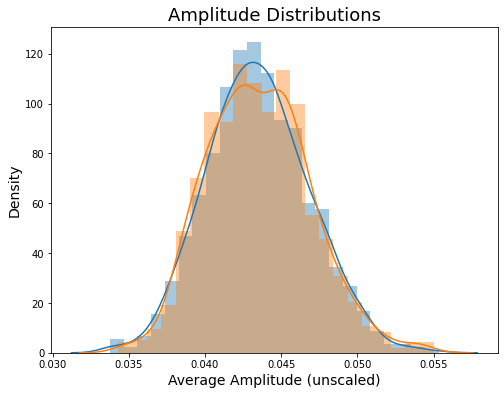

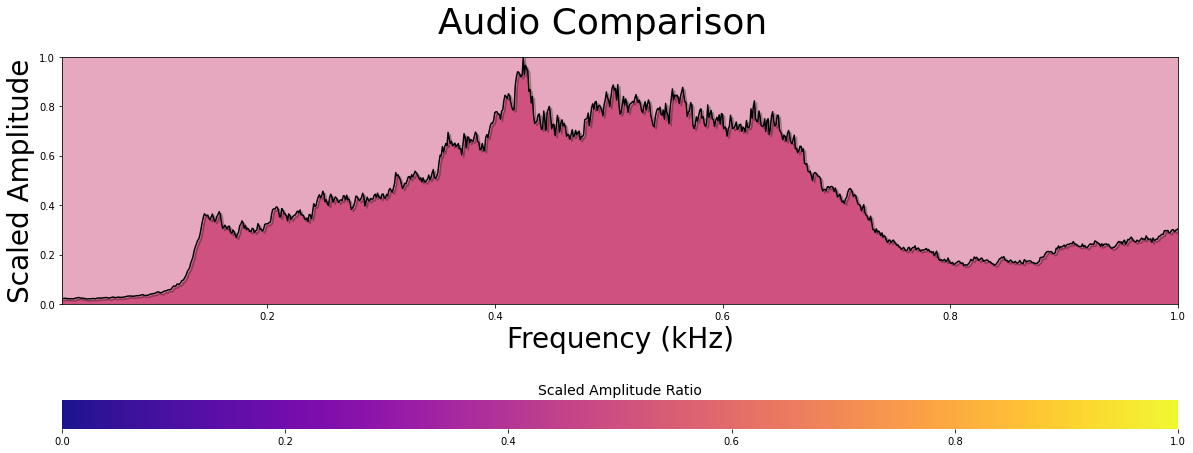

In [39]:
equal = SpectrumCompare(gt, gt)

equal.plot_amplitude_distributions()
equal.plot_spectrum_heatmap(frange=(20,1000))